In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import random
from scipy.stats import norm
from tqdm.auto import tqdm

In [233]:
data = pd.read_csv('ba2.csv')

In [234]:
# for i in data.columns:
#     if len(data[i].unique()) > 4:
#         print(f'"{i}",')

In [235]:
TARGET = 'Тяжесть'

In [236]:
data[TARGET].unique()

array([3, 2], dtype=int64)

In [300]:
name_group_all = {
    'Тяжесть' : ['БАТТ', 'БАСТ'],
    'SNP_rs896' : ['TT', 'TC', 'CC']
}

In [309]:
name_group_all

{'Тяжесть': ['БАТТ', 'БАСТ'], 'SNP_rs896': ['TT', 'TC', 'CC']}

In [304]:
name_group_all[TARGET]

['БАТТ', 'БАСТ']

In [239]:
#обозначение групп

name_group = name_group_all[TARGET]
#spisok_group
data = data.dropna(subset=[TARGET])
data = data.astype({TARGET: np.int32})
#обозначение групп

In [240]:
data[TARGET].unique()

array([3, 2])

In [241]:
#data['Тяжесть'].sum()

In [242]:
#for i in range(len(data['Тяжесть'])):
#    if data.loc[i,'Тяжесть'] == 2:
#        data.loc[i,'Тяжесть'] = 1
#    elif data.loc[i,'Тяжесть'] == 3:
#        data.loc[i,'Тяжесть'] = 0
        

In [509]:
#необходимо обозначить какие переменные к какой группе относятся
scale = [
'Приступов_удушья_в_день',
'Обострений_в_год',
'Длительность_БА_на_момент_исслед',
'САД',
'ДАД',
'ЧД',
'ЧСС',
'Пульс',
'Сатурация_при_поступлении',
'Сатурация_при_выписке',
'Лейкоциты_при_поступлении',
'Эритроциты_при_постпулении',
'Гемоглобин_при_поступлении',
'Тромбоциты_при_поступлении',
'Сегментоядерные_при_поступлении',
'Эозинофилы_при_поступлении',
'Моноциты_при_поступлении',
'Лимфоциты_при_поступлении',
'СОЭ_при_поступлении',
'Лейкоциты_при_выписке',
'Эритроциты_при_выписке',
'Гемоглобин_при_выписке',
'Тромбоциты_при_выписке',
'Сегментоядерные_при_выписке',
'Лимфоциты_при_выписке',
'СОЭ_при_выписке',
'БАК_посев_мокроты',
'IgE_общий',
'FeF25_при_поступлении',
'FeF50_при_поступлении',
'FeF75_при_поступлении',
'FeF25_при_выписке',
'FeF50_при_выписке',
'FeF75_при_выписке',
'ЧСС_ЭКГ',
'Общий_билирубин',
'Глюкоза_крови',
'Общий_белок',
'Холестерин',
'Возраст2',
'Рост',
'Вес',
'обострений_за_последний_год',
'ACQ_контроль_симптомов_БА',
'Самочувствие',
'Активность',
'Настроение',
'Экстраверсия_интроверсия',
'Ригидность_пластичность',
'Эмоционвозбудим_уравновешенность',
'Быстрота_реакц_медлительность',
'Активность_пасивность',
'Искренность',
'Реактивная_тревожность',
'Ситуатвиная_тревожность',
'Физическая_активность_PF',
'Физичпроблемы_в_жизнедеят_RP',
'Интенсивность_боли_BP',
'Общее_здоровье_GH',
'Жизненная_актвиность_VT',
'Социальная_активность_SF',
'Эмоционал_проблемы_в_жизнедеят_RE',
'Психическое_здоровье_MH',
'Физич_компонент_здор_PH',
'Психич_компонент_здор_MH',
'Наличие_вегет_дисфун',
'Наличие_вегет_дисфун2',
'Апатия1',
'Апатия2',
'Уровень_VIP',
'Уровень_SP',
'ЖЕЛ_при_поступлении',
'ОФВ1_при_поступлении',
'Индекс_Тиффно_при_поступлении',
'ЖЕЛ_при_выписке',
'ОФВ1_при_выписке',
'Индекс_Тиффно_при_выписке',
'ИМТ',
'VAR_mc',
'aVNN_mc',
'SDNN_mc',
'pNN50',
'rMSSD',
'SDNNidx_mc',
'SDANN_mc',
'VLF',
'LF_Симпатика',
'HF_Парасимпатика',
'nHF',
'CBBP',
'LF_HF',
]
categorial = [
# "Сезон_обострения_БА",
# "Худшее_время_суток_по_БА",
# "Ухудшение_состояния_в_отпуске",
# "Заболевания_ЖКТ",

"Терапия_БА",
"Профессия",
"Форма",
"Тяжесть",
"Оценка_соц_бытовых_условий",
"ДН",
"Эмфизема",
"ХЛС",
"Пневмосклероз",
"Гормонозависимость",
"Проживание",
"Профессиональное_заболевание",
"ГБ",
"ИБС",
"ГЭРБ",
"Симбикорт",
"Формисонид_натив",
"Дуоресп_Спиромакс",
"Спирива",
"Беродуал",
"Форадил_комби",
"Сальбутамол",
"Серетид",
"Преднизолон_per_os",
"Антилейкотриеновые",
"Беклометазон",
"Эуфиллин_per_os",
"Сингуляр",
"Фостер",
"Сибри",
"Беротек",
"Ипратерол",
"Палочкоядерные_при_поступлении",
"Базофилы_при_постпулении",
"Палочкоядерные_при_выписке",
"Эозинофилы_при_выпсике",
"Моноциты_при_выписке",
"Базофилы_при_выписке",
"Наличие_суносовой_аритмии",
"Наличие_гипертрофии_ЛЖ",
"Эозинофилы_в_мокроте",
"Пол",
"Наличие_работы",
"Работа_в_ночную_смену",
"Профессиональый_контакт",
"Образование",
"Наличие_аллергической_реакции",
"Аллерг_реакция_у_родственников",
"Наличие_заболевания_ЖКТ",
"Наличие_заболевания_ЛОРорганов",
"Наличие_грибковых_заболеваний",
"Ухудшение_состояния_при_физнагруз",
"Ухудшение_состояния_во_время_еды",
"Влияние_менструальногоцикла_на_БА",
"Наличие_ОтёкаКвинке_в_анамнезе",
"Наличие_стресса",
"Наличие_других_заболеваний",
 "SNP_rs896",
 "SNP_rs2072100",
"SNP_rs3771829",
 "SNP_rs3823082",
 "Фенотип",
# "Коридор",
 "Симпатика",
]


In [510]:
spisok_group = categorial

In [527]:
def test_fishera(data, i , name_group_all):
    data = data.dropna(subset=[i])
    data = data.astype({i: np.int32})
    n_ind = len(data[i].unique())+1
    data_vr = np.zeros((n_ind, 9))
    col_ch = 0
    for col in data[TARGET].unique():
        vsego = 0
        ind_ch = 0
        for ind in data[i].unique():
            data_vr[ind_ch, col_ch] = data[(data[i] == ind) & (data[TARGET] == col)][TARGET].count()
            vsego += data[(data[i] == ind) & (data[TARGET] == col)][TARGET].count()
            ind_ch += 1
        data_vr[len(data[i].unique()),col_ch] = vsego
        col_ch += 1
    data_vr[n_ind-1,2] = data_vr[n_ind-1,1]
    data_fisher = np.zeros((2,2))   
    for j in range(n_ind-1):
        data_fisher[0,0] = data_vr[j,0]
        data_fisher[0,1] = data_vr[j,1]
        data_fisher[1,0] = data_vr[n_ind-1,0] - data_vr[j,0]
        data_fisher[1,1] = data_vr[n_ind-1,1] - data_vr[j,1]
        stat, p = st.fisher_exact(data_fisher)
        data_vr[j,2] = data_fisher[0,1]
        print(stat)
        data_vr[j,4] = round(stat, 2)
        data_vr[j,5] = round(p, 3)
        data_vr[j,6] = ((data_vr[j,0] / (data_vr[n_ind-1,0] - data_vr[j,0])) /
                             (data_vr[j,1] / (data_vr[n_ind-1,1] - data_vr[j,1])))
        print(((data_vr[j,0] / (data_vr[n_ind-1,0] - data_vr[j,0])) /
                             (data_vr[j,1] / (data_vr[n_ind-1,1] - data_vr[j,1]))))
        data_vr[j,7] = round(math.exp(math.log(data_vr[j,6]) 
                                      - 1.96*math.sqrt(1/data_fisher[0,0]+1/data_fisher[0,1]+1/data_fisher[1,0]+1/data_fisher[1,1])),2)
        data_vr[j,8] = round(math.exp(math.log(data_vr[j,6])
                                               +1.96*math.sqrt(1/data_fisher[0,0]+1/data_fisher[0,1]+1/data_fisher[1,0]+1/data_fisher[1,1])),2)
        data_vr[j,1] = round(data_fisher[0,0] / data_vr[n_ind-1,0] * 100, 2)
        data_vr[j,3] = round(data_fisher[0,1] / data_vr[n_ind-1,2] * 100, 2)

    data_vr[n_ind-1,1] = 100
    data_vr[n_ind-1,3] = 100
    cl = []

    for j in range(n_ind):
        cl.append(f'{data_vr[j,7]} - {data_vr[j,8]}')

    try: name_g = name_group_all[TARGET]    
    except: name_g = data[TARGET].unique()

    df = {f'{name_g[0]} (абс.)': [int(data_vr[j,0]) for j in range(n_ind)], 
          f'{name_g[0]} (%)': [data_vr[j,1] for j in range(n_ind)],
          f'{name_g[1]} (абс.)' : [int(data_vr[j,2]) for j in range(n_ind)], 
          f'{name_g[1]} (%)': [data_vr[j,3] for j in range(n_ind)],
          'F': [data_vr[j,4] for j in range(n_ind)],
          'p': [data_vr[j,5] for j in range(n_ind)],
          'OR': [data_vr[j,6] for j in range(n_ind)],
          'CI - 95%': [cl[j] for j in range(n_ind)],

         } 

    df = pd.DataFrame(df)

    df.loc[n_ind-1, 'F' : 'CI - 95%'] = ''
   
    try:
        name = []
        name2 = name_group_all[i]
        for j in range(len(name2)):
            name.append(name2[j])
        name.append('Всего:')
        df.index = name
    except: 
        1
    
    plot_bar(data, data_vr, i , name_group_all)
    display(df) 
    return(data_vr)

Терапия_БА
1.7454545454545454
1.7454545454545456
5.111111111111111
5.111111111111111
3.2142857142857144
3.214285714285714
0.35944700460829493
0.35944700460829493
0.46332046332046334
0.4633204633204634
1.1794871794871795
1.1794871794871795
12


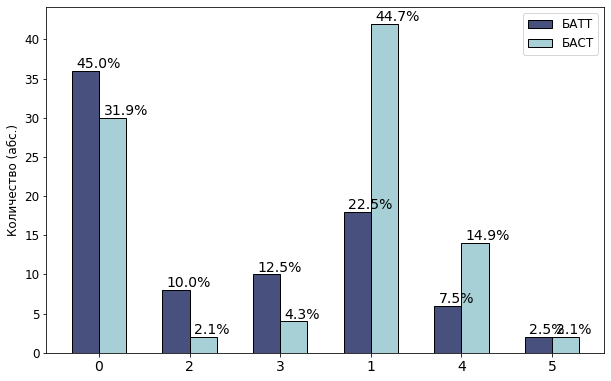

,БАТТ (абс.),БАТТ (%),БАСТ (абс.),БАСТ (%),F,p,OR,CI - 95%
0,36,45.0,30,31.91,1.75,0.086,1.745455,0.94 - 3.24
1,8,10.0,2,2.13,5.11,0.045,5.111111,1.05 - 24.81
2,10,12.5,4,4.26,3.21,0.054,3.214286,0.97 - 10.68
3,18,22.5,42,44.68,0.36,0.002,0.359447,0.19 - 0.7
4,6,7.5,14,14.89,0.46,0.156,0.46332,0.17 - 1.27
5,2,2.5,2,2.13,1.18,1.0,1.179487,0.16 - 8.57
6,80,100.0,94,100.00,,,,


Профессия
2.5
2.4999999999999996
0.35964912280701755
0.35964912280701755
2.4210526315789473
2.4210526315789473
0.7719298245614035
0.7719298245614036
inf
inf
1.9838709677419355
1.9838709677419357
0.37606837606837606
0.37606837606837606
2.4210526315789473
2.4210526315789473
1.5357142857142858
1.5357142857142856
0.5769230769230769
0.5769230769230769
0.46332046332046334
0.4633204633204634
0.1752136752136752
0.17521367521367523
inf
inf
3.72972972972973
3.72972972972973
0.0
0.0


C:\Users\KarimovDO\AppData\Local\Temp\ipykernel_14608\3686750785.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  data_vr[j,6] = ((data_vr[j,0] / (data_vr[n_ind-1,0] - data_vr[j,0])) /
C:\Users\KarimovDO\AppData\Local\Temp\ipykernel_14608\3686750785.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  print(((data_vr[j,0] / (data_vr[n_ind-1,0] - data_vr[j,0])) /
C:\Users\KarimovDO\AppData\Local\Temp\ipykernel_14608\3686750785.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  - 1.96*math.sqrt(1/data_fisher[0,0]+1/data_fisher[0,1]+1/data_fisher[1,0]+1/data_fisher[1,1])),2)
C:\Users\KarimovDO\AppData\Local\Temp\ipykernel_14608\3686750785.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  +1.96*math.sqrt(1/data_fisher[0,0]+1/data_fisher[0,1]+1/data_fisher[1,0]+1/data_fisher[1,1])),2)


ValueError: math domain error

In [528]:
for i in categorial:
    print(i)
    data_vr = test_fishera(data, i, name_group_all)
    print('===============================================================================')

In [529]:
def plot_bar(data, data_vr, i , name_group_all):
    plt.figure(figsize=(10,6))
    # ширина полос
    barWidth = 0.3

    # высота 1 ряда
    bars1 = [data_vr[j,0] for j in range(len(data_vr[:,0])-1)]
    # высота 2 ряда
    bars2 = [data_vr[j,2] for j in range(len(data_vr[:,0])-1)]
    bars3 = bars1 + bars2
    # ошибки 1
    yer1 = [0.5, 0.4, 0.5]
    # ошибки 2
    yer2 = [1, 0.7, 1]
    # The x position of bars
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    try:
        name = name_group_all[TARGET]
    except: 
        name = data[TARGET].unique()

    # Create blue bars
    ax = plt.bar(r1, bars1, width = barWidth, color = '#48507E', edgecolor = 'black', label=name[0])

    # Create cyan bars
    ax = plt.bar(r2, bars2, width = barWidth, color = '#A6CFD6', edgecolor = 'black', label=name[1])

    # general layout
    
    try:
        name = name_group_all[i]
    except: 
        name = data[i].unique()
        
    #name = [xi for xi in name if str(xi) != 'nan']
    # Create labels
    # высота 1 ряда
    pr1 = [data_vr[j,1] for j in range(len(data_vr[:,0])-1)]
    pr2 = [data_vr[j,3] for j in range(len(data_vr[:,0])-1)]
    pr3 = pr1 + pr2
    label = [f'{pr3[j]:.1f}%' for j in range(len(pr3))]
    print(len(pr3))
    if len(pr3) == 4:
        r3 = [-0.1,0.9,0.2,1.2]
    elif len(pr3) == 6:
        r3 = [-0.1,0.9,1.9,0.2,1.2, 2.2]
    elif len(pr3) == 8:
        r3 = [-0.1,0.9,1.9,2.9, 0.2,1.2, 2.2,3.2]
    elif len(pr3) == 10:
        r3 = [-0.1,0.9,1.9,2.9, 3.9, 0.2,1.2, 2.2,3.2, 4.2]
    elif len(pr3) == 12:
        r3 = [-0.1,0.9,1.9,2.9, 3.9,4.9, 0.2,1.2, 2.2,3.2, 4.2,5.2]
    elif len(pr3) == 10:
        r3 = [-0.1,0.9,1.9,2.9, 3.9,4.9,5.9, 0.2,1.2, 2.2,3.2, 4.2,5.2,6.2]
    # Text on the top of each bar
    for i in range(len(r3)):
        plt.text(x = r3[i] , y = bars3[i]+0.35, s = label[i], size = 14)

    plt.xticks([r + barWidth -0.15 for r in range(len(bars1))], name, size = 14)
    plt.yticks(size = 12)
    plt.ylabel('Количество (абс.)', size = 12)
    plt.legend(fontsize = 12)
    plt.subplots_adjust(bottom= 0.2, top = 1)
    # Show graphic
    plt.show()

## print(st.fisher_exact(data))